In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [48]:
df = pd.read_csv('E:\CodSoft\CODSOFT\Task_03_Iris_FLowe_Classification\IRIS.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\pc tec\AppData\Local\Temp\ipykernel_8248\41589373.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('E:\CodSoft\CODSOFT\Task_03_Iris_FLowe_Classification\IRIS.csv')


Exploring the Data

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
print(df.shape)

(150, 5)


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [52]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [53]:
print(df.duplicated().sum())


3


In [54]:
print(df.nunique())

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


In [55]:
df.isnull().sum()/len(df) *100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

Data Preprocessing

In [56]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

Data Analysis and Visualization

In [57]:
species_freq = df['species'].value_counts().reset_index()
species_freq

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


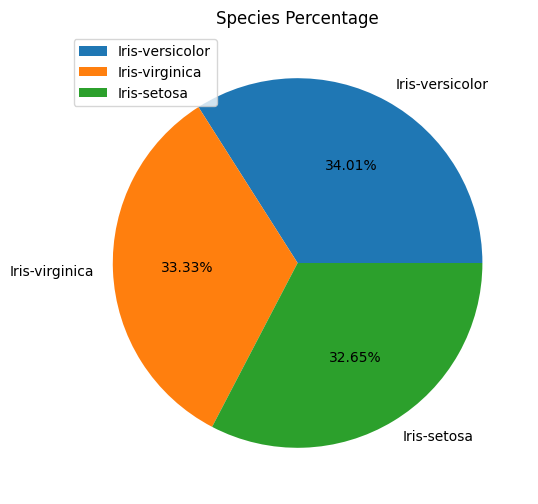

In [58]:
plt.figure(figsize=(10,6))
plt.pie(species_freq['count'],labels=species_freq['species'], autopct='%.2f%%',)
plt.title('Species Percentage')
plt.legend()
plt.show()

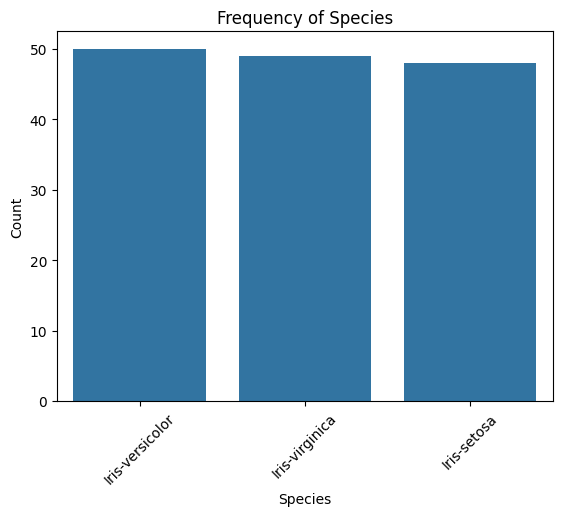

In [59]:
sns.barplot(x=species_freq['species'], y=species_freq['count'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Frequency of Species')
plt.xticks(rotation=45) 
plt.show()

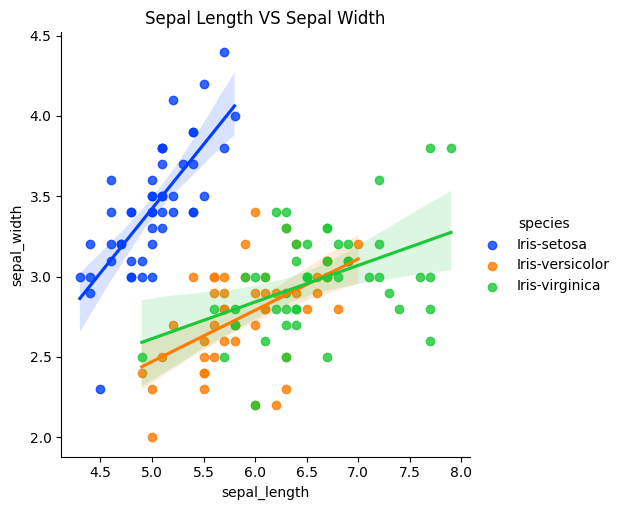

In [60]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

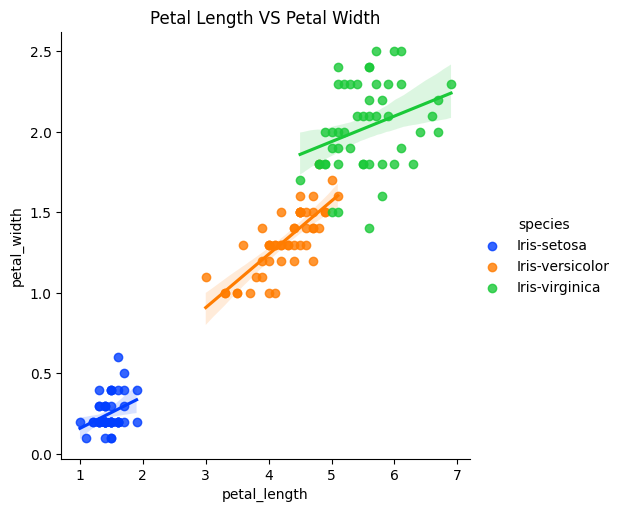

In [61]:
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Petal Length VS Petal Width")
plt.show()

Model Selection and Building

In [62]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
df2 = df.drop(['sepal_length','sepal_width'], axis=1)

print(df2.head())

   petal_length  petal_width  species
0           1.4          0.2        0
1           1.4          0.2        0
2           1.3          0.2        0
3           1.5          0.2        0
4           1.4          0.2        0


In [65]:
x= df.drop('species', axis=1)
y = df['species']

x2= df2.drop('species', axis=1)
y2 = df2['species']

In [66]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=28)
X_train2, x_test2, Y_train2, y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=28)


1-Logistic Regression

In [67]:

clf = LogisticRegression() 

In [68]:
clf.fit(X_train,Y_train)


LogisticRegression()

In [69]:
print(clf.score(X_train,Y_train)*100)
print(clf.score(x_test,y_test)*100)

98.0392156862745
93.33333333333333


In [70]:
clf.fit(X_train2,Y_train2)


LogisticRegression()

In [71]:
print(clf.score(X_train2,Y_train2) *100)
print(clf.score(x_test2,y_test2)*100)

98.0392156862745
91.11111111111111


2-Naive Bayes (Gaussian)

In [72]:
clf2 = GaussianNB()
clf2.fit(X_train,  Y_train)

print(clf2.score(X_train,Y_train) *100)
print(clf2.score(x_test,y_test)*100)

97.05882352941177
86.66666666666667


In [73]:
clf2 = GaussianNB()
clf2.fit(X_train2,  Y_train2)

print(clf2.score(X_train2,Y_train2) *100)
print(clf2.score(x_test2,y_test2)*100)

97.05882352941177
95.55555555555556


3- Random Forest

In [74]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,  Y_train)

RandomForestClassifier()

In [75]:
print(clf3.score(X_train,Y_train) *100)
print(clf3.score(x_test,y_test)*100)

100.0
91.11111111111111


In [76]:
clf3 = RandomForestClassifier()
clf3.fit(X_train2,  Y_train2)

RandomForestClassifier()

In [77]:
print(clf3.score(X_train2,Y_train2) *100)
print(clf3.score(x_test2,y_test2)*100)

99.01960784313727
91.11111111111111


Thank You